# FeedForward Tutorial
---
A feedforward neural network is an artificial neural network wherein connections between the nodes do not form a cycle. As such, it is different from recurrent neural networks. It is illustrated in the following figure
![title](img/feed_forward.png)

The feedforward neural network was the first and simplest type of artificial neural network devised. In this network, the information moves in only one direction, forward, from the input nodes, through the hidden nodes (if any) and activation funtion to the output nodes. There are no cycles or loops in the network.

![title](img/single.png)
The simplest kind of neural network is a single-layer perceptron network, which consists of a single layer of output nodes; the inputs are fed directly to the outputs via a series of weights. In this way it can be considered the simplest kind of feed-forward network. The sum of the products of the weights and the inputs is calculated in each node, and if the value is above some threshold (typically 0) the neuron fires and takes the activated value (typically 1); otherwise it takes the deactivated value (typically -1). 

### What is Activation Function ?
You could have a question about activation function. It’s just a thing (node) that you add to the output end of any neural network. It is also known as **Transfer Function**. It can also be attached in between two Neural Networks.It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 (sigmoid) whatever the inputs are.
![title](img/sigmoid.png)

### Single-layer perceptron network : 
It can only solve linear problems such as AND problem and OR problem (see the following figure)
![title](img/linear.png)

However, it cannot solve XOR problem due to it is a non-linear problem. We could not use a single line to split it to two parts.(see the following figure)
![title](img/nonlinear.png)
If we use two and more layers of neural network, it colud solve the problem with two decision boundaries like the following figure.**Each "Decision Boundary" line represents one layer** in our MLP.
![title](img/two-layer.png)



## Plan to code a feedforward Pass
---
How can we do the forward pass by code ? We take a look the following figure : 
<img src="img/feedforward.png" alt="drawing" width="500px"/>

If our input $X=\{x_0,x_1,...,x_n\}$,each output value $o_j$ can be calculate by :

### $o_j = \sigma[{\sum^{n}_{i=0}{W_{ij}x_{j}+b_{j}}}]$
where $W\in R^{ i x j}$, $b\in R^{ j}$ and $\sigma$ is activation function. The formula can be implement by ** two multiplied matrices ** and ** plus a bias vector ** like this:
![title](img/mutipled_matrix.png)


## Start to code a feedforward pass
---
### First we need to import packages and defined some variable for later work
* numpy

### We need the variables in the following list :
* weights 
* bias
* number of layers
* update_weight (backward)
* update_bias (backward)


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(1)  # Seed the random number generator, we can reproduce our results deterministically
weights = {}  # weights
biases = {} # bias
num_layers = 1  # Set initial number of layer to one (input layer)
adjustments_w = {}  # adjustements
adjustments_b = {}  # adjustements

In [2]:
def init():
    global num_layers
    global weights
    global biases
    global adjustments_w
    global adjustments_b
    weights = {}  # weights
    biases = {} # bias
    num_layers = 1  # Set initial number of layer to one (input layer)
    adjustments_w = {}  # adjustements
    adjustments_b = {}  # adjustements

## Define a add_layer function that can add layer in the network
---
#### When a layer was build, we must initial layer's variables:
* weights $W_{m \times n}$: random value in range [-1,1] 
* bias $b_{n}$ : random value in range [-1,1]  
* update_weight $\Delta W_{m \times n}$: 0 
* update_bias $\Delta b_{n}$ : 0 

#### Then, you should add the number of layers to record how many layers we have.

In [3]:
def add_layer(shape):
    global num_layers
    global weights
    global biases
    global adjustments_w
    global adjustments_b
    
    # inital weights in range(-1,1) 
    weights[num_layers] = 2 * np.random.random(shape) - 1
    # inital bias in range(-1,1)
    biases[num_layers] = 2 * np.random.random((1,shape[1])) - 1
    # inital adjustements i
    adjustments_w[num_layers] = np.zeros(shape)
    adjustments_b[num_layers] = np.zeros((1,shape[1]))
    # plus num_layer 
    num_layers += 1

## Define activation functions 
---
### In the feedforward neural network, we should use two activation function:
* sigmoid : It is used to calculate the value in feedfoward.
    
### $ \sigma(x) = \frac{1}{1 + e^{-x}} $
    


In [4]:
# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Define forward_propagate function
---
In this function, we need to caculate each layer output. According to the plan we have mentioned above, the outputs are got by ** mutlipling a vector of inputs and a matrix of weights**, then **plus a bias vector**. Final, we use **activation function (sigmoid)** to map the outputs into the range[0,1]. Ater that, we will finish the step of forward pass. 

In [5]:
def forward_propagate(data):       
    global num_layers
    global weights
    global biases
    # Progapagate through network and hold values for use in back-propagation
    activation_values = {}
    activation_values[1] = data

    for layer in range(2,num_layers+1):
        # y = data.T (batch_size, input_size) * weight(input_size, output_size) + bias(output_size)    
        data = np.dot(data.T, weights[layer-1])+ biases[layer-1]
        # a = f(y)
        data = sigmoid(data).T
        activation_values[layer] = data
        
    return activation_values

## Plan to code a backward Pass
---
How did we set our weights in forward pass ? We must define a **loss function** to decide what weights can decrease difference of outputs and label. To find the minimum value of loss by given weights, we must use **gradient descent** algorithm to optimize. **Gradient descent** is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.


To caculate each layer's update_weight and update_bias, we must partial differentiate the loss function with our parameters.You can watch [the video](https://www.youtube.com/watch?v=ibJpTrp5mcE) which introduces how can we optimize our parameters from loss function by backward pass. The following equactions show how can we get **update_weights** and **update_bias** by **chain rule**. 

update_weight $\Delta w $ = $\frac{\partial L}{\partial w} $= $\frac{\partial L}{\partial {y}}\frac{\partial {y}}{\partial w} $

update_bias $\Delta b $ = $\frac{\partial L}{\partial b} $= $\frac{\partial L}{\partial {y}}\frac{\partial {y}}{\partial b} $

#### weight
$\frac{\partial y}{\partial w} =\frac{\partial (Wx + b)}{\partial y}$  =  $x$

#### bias ( just different with weight in this part )
$\frac{\partial b}{\partial w} =\frac{\partial (Wx + b)}{\partial b}$ =  $1$ 

---
$\frac{\partial L}{\partial y} =\frac{\partial a}{\partial y} \frac{\partial L}{\partial a} $

$\frac{\partial a}{\partial y} =\frac{\partial \sigma(y)}{\partial y} = $   $\sigma^{'}(y)$




#### if layer is output layer :

$\frac{\partial L}{\partial y} = \sigma^{'}(y) \frac{\partial L}{\partial a} = \sigma^{'}(y) \frac{\partial (y \log(a) + (1-y)\log(1-a))}{\partial a} =  \sigma^{'}(y) \times (a-y)$


#### if layer is hidden layer :

$\frac{\partial L}{\partial y} = \sigma^{'}(y) \frac{\partial L}{\partial a} $ 


$\frac{\partial L}{\partial a} = \frac{\partial y_{n+1}}{\partial a}\frac{\partial L}{\partial y_{n+1}} = w \times \frac{\partial L}{\partial y_{n+1}} $

($\frac{\partial L}{\partial y_{n+1}}$has been computed at last iteration )

## Start to code a backward pass
---
## Define loss function
For our XOR problem,a classification task, we consider the inputs and decide its output is **"True"** or **False**. Therefore, we take cross entropy as our loss function. The loss function is defined by :

<img src="img/loss.png" alt="drawing" width="300px"/>

In [6]:
def loss_func(outputs, targets):
    # cross_entropy 
    return np.mean(-np.sum(targets * np.log(outputs) + (1- targets) * np.log(1-outputs), axis=1))

## Define the derivative of sigmoid function
---
It is used to calculate the gradient in backward pass.
$ \frac{d\sigma(x)}{d(x)}$</span> = $\sigma(x) \times (1-\sigma(x)) $

In [7]:
# derivative of sigmoid  
def sigmoid_derivative(x):
    return x * (1 - x)

## Define back_propagate function

In [8]:
def back_propagate(outputs, targets):
    global num_layers
    global weights
    global biases
    global adjustments_w
    global adjustments_b
    
    deltas = {}

    # Delta of output Layer ( cross_entropy derivative is (output-target))
    # L/y = sigmoid_derivative * (loss_func_derivative)
    deltas[num_layers] = sigmoid_derivative(outputs[num_layers])*(outputs[num_layers] - targets)
   
    # Delta of hidden Layers
    # L/y = sigmoid_derivative * (weight * last L/y)  
    for layer in reversed(range(2, num_layers)):  # All layers except input/output
        a_val = outputs[layer]
        weight = weights[layer]
        bias = biases[layer]
        prev_deltas = deltas[layer+1]

        deltas[layer] = np.multiply(np.dot(weight, prev_deltas), sigmoid_derivative(a_val))
 

    # Caclculate total adjustements based on deltas
    # update_weight = L/y * x
    # update_bais = L/y * 1
    for layer in range(1, num_layers):
        adjustments_w[layer] += np.dot(deltas[layer+1],outputs[layer].T).T
        adjustments_b[layer] += np.dot(deltas[layer+1],1).T


## Define gradient_descent function
---
$ w_{new} = w - \eta \Delta{w} $ 


$ b_{new} = b - \eta \Delta{b} $ 

In [9]:
def gradient_descent(batch_size, learning_rate):
    global num_layers
    global weights
    global biases
    global adjustments_w
    global adjustments_b
    
    # Calculate partial derivative and take a step in that direction
    for layer in range(1, num_layers):

        partial_w = (1/batch_size) * adjustments_w[layer]
        partial_b = (1/batch_size) * adjustments_b[layer]


        weights[layer] += learning_rate * -partial_w
        biases[layer] += learning_rate * -partial_b

## Define train function
---
#### Order of train :
    1. forward_prop
    2. caculate loss
    3. back_prop
    4. gradient_descent
    
    

In [10]:
def train(inputs, targets, num_epochs, learning_rate=0.01, stop_loss=1e-5):
    global num_layers
    error = []

    for iteration in range(num_epochs):
        loss = 0
        for i in range(len(inputs)):
            x = inputs[i]
            y = targets[i]
            
            # Pass the training set through our neural network
            output = forward_propagate(x)

            # Calculate the error
            loss += loss_func(output[num_layers], y)
            
            # Calculate Adjustements
            back_propagate(output, y)

        gradient_descent(i, learning_rate)
        error.append(loss/len(inputs))
        # Check if loss criterion is satisfied
        if np.mean(error[-(i+1):]) < stop_loss and iteration > 0:
            break

    #show the loss curve
    plt.plot(range(len(error)), error)
    plt.show()

    return(np.asarray(error), iteration+1)

## Define predict function
---
We must have a function to map value to True and False

In [11]:
def predict(data):
    global num_layers
    global weights
    global biases

    # pass data through pre-trained network
    for layer in range(1,num_layers):
        # h = data (batch_size, input_size) * weight(input_size, output_size) + bias(output_size) 
        data = np.dot(data, weights[layer]) + biases[layer]
        # a = f(h)
        data = sigmoid(data)
        
    data = data > 0.5
    return data

## AND Dataset
---
Our first dataset is AND problem. The AND gate have to let all inputs are true and its output will be true. The following figure is AND truth table
![title](img/AND_truth_table.png)

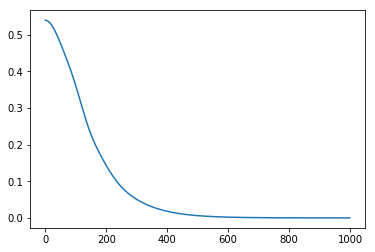

Error =  3.32089277585e-05
Epoches needed to train =  1000
data [0 0], value [False]
data [0 1], value [False]
data [1 0], value [False]
data [1 1], value [ True]


In [12]:
# Add Layers (Input layer is created by default)
init()
add_layer((2, 1))

# AND function
training_data = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]]).reshape(4, 2, 1)
training_labels = np.asarray([[0], [0], [0], [1]])

error, iteration = train(training_data, training_labels, 1000)
print('Error = ', np.mean(error[-4:]))
print('Epoches needed to train = ', iteration)

training_data = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]]).reshape(4, 2)
label = predict(training_data)

for i in range(4):
    print("data {}, value {}".format(training_data[i],label[i]))


## XOR Dataset
---
Our second dataset is XOR problem. The XOR gate is a digital logic gate that gives a true (1 or HIGH) output when the number of true inputs is odd.
![title](img/XOR_truth_table.png)

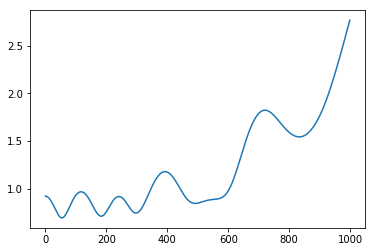

Error =  2.74960197114
Epoches needed to train =  1000
data [0 0], value [False]
data [0 1], value [ True]
data [1 0], value [ True]
data [1 1], value [ True]


In [13]:
# Add Layers (Input layer is created by default)
init()
add_layer((2, 1))

# XOR function
training_data = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]]).reshape(4, 2, 1)
training_labels = np.asarray([[0], [1], [1], [0]])

error, iteration = train(training_data, training_labels, 1000)
print('Error = ', np.mean(error[-4:]))
print('Epoches needed to train = ', iteration)

training_data = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]]).reshape(4, 2)
label = predict(training_data)

for i in range(4):
    print("data {}, value {}".format(training_data[i],label[i]))


We can't predict correct value in XOR problem in single layer because XOR is non-linear problem. Therefore, we add one more layer to enhance our network. 

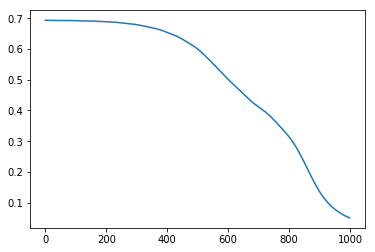

Error =  0.0512476351996
Epoches needed to train =  1000
data [0 0], value [False]
data [0 1], value [ True]
data [1 0], value [ True]
data [1 1], value [False]


In [14]:
# Add Layers (Input layer is created by default)
init()
add_layer((2, 4))
add_layer((4, 1))

# XOR function
training_data = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]]).reshape(4, 2, 1)
training_labels = np.asarray([[0], [1], [1], [0]])

error, iteration = train(training_data, training_labels, 1000)
print('Error = ', np.mean(error[-4:]))
print('Epoches needed to train = ', iteration)

training_data = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]]).reshape(4, 2)
label = predict(training_data)

for i in range(4):
    print("data {}, value {}".format(training_data[i],label[i]))

## Reference 
---
Feedforward in Wiki : https://en.wikipedia.org/wiki/Feedforward
<br>
CS231n : http://cs231n.github.io/optimization-2/
<br>
Feedforward Neural Networks in BRILLIANT :https://brilliant.org/wiki/feedforward-neural-networks/
<br>
李宏毅 backpropgation 教學視頻 : https://www.youtube.com/watch?v=ibJpTrp5mcE